## Assignment 2

Make a 12-panel plot of the climatology (1 panel for each month) of your data. If your data is not at a time frequency that allows monthly climatology, either choose individual times or a different aggregation (seasonal? year?). Make the plot look publication quality with titles, units, labels, good colorbar, continents, etc.

To submit your assignment: •Create a repository on github.com for your assignment •Upload your Jupyter Notebook •Create 1 issue •Describe one way you would improve your figure. There is always something to improve, so think critically about what you could do to make it more clear, nicer, better suited to a particular medium, etc

Send an email to me with a link to your repository.

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import netCDF4

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point

In [2]:
file='/scratch/myuan5/CLIM680/precip.mon.total.v401.nc'
ds=xr.open_dataset(file)
ds

<xarray.Dataset> Size: 12MB
Dimensions:  (lon: 720, time: 12, lat: 360)
Coordinates:
  * lon      (lon) float32 3kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 96B 2014-01-01 2014-02-01 ... 2014-12-01
  * lat      (lat) float32 1kB 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
Data variables:
    precip   (time, lat, lon) float32 12MB ...
Attributes: (12/13)
    Conventions:         CF-1.0
    Source:              http://climate.geog.udel.edu/~climate/html_pages/Glo...
    version:             4.01
    history:             created 2/2016 by CAS NOAA/ESRL PSD
    title:               Terrestrial Air Temperature and Precipitation: V4.01
    dataset_title:       Terrestrial Air Temperature and Precipitation: 1900-...
    ...                  ...
    References:          https://www.psl.noaa.gov/data/gridded/data.UDel_AirT...
    History:             Translated to CF-1.0 Conventions by Netcdf-Java CDM ...
    geospatial_lat_min:  -90.0
    geospatial_lat_max:  90.0
    geospatial_lon_min:  -180.0
    geospatial_lon_max:  180.0

In [3]:
precipitation = ds['precip']
precipitation

<xarray.DataArray 'precip' (time: 12, lat: 360, lon: 720)> Size: 12MB
[3110400 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 3kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 96B 2014-01-01 2014-02-01 ... 2014-12-01
  * lat      (lat) float32 1kB 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
Attributes:
    units:         cm
    var_desc:      Precipitation
    level_desc:    Surface
    statistic:     Total
    parent_stat:   Other
    long_name:     Monthly total of precipitation
    cell_methods:  time: sum
    avg_period:    0000-01-00 00:00:00
    actual_range:  [  0.   776.75]
    dataset:       Univ. of Delaware Precipitation and Air Temp v4.01
    valid_range:   [   0. 1200.]

In [29]:
min_value = precipitation.min().values
max_value = precipitation.max().values
print(max_value)
print(min_value)

267.83001708984375
0.0


In [4]:
# Create a list of month names for the subplots
month_names = [
    'January', 'February', 'March', 'April',
    'May', 'June', 'July', 'August',
    'September', 'October', 'November', 'December'
]

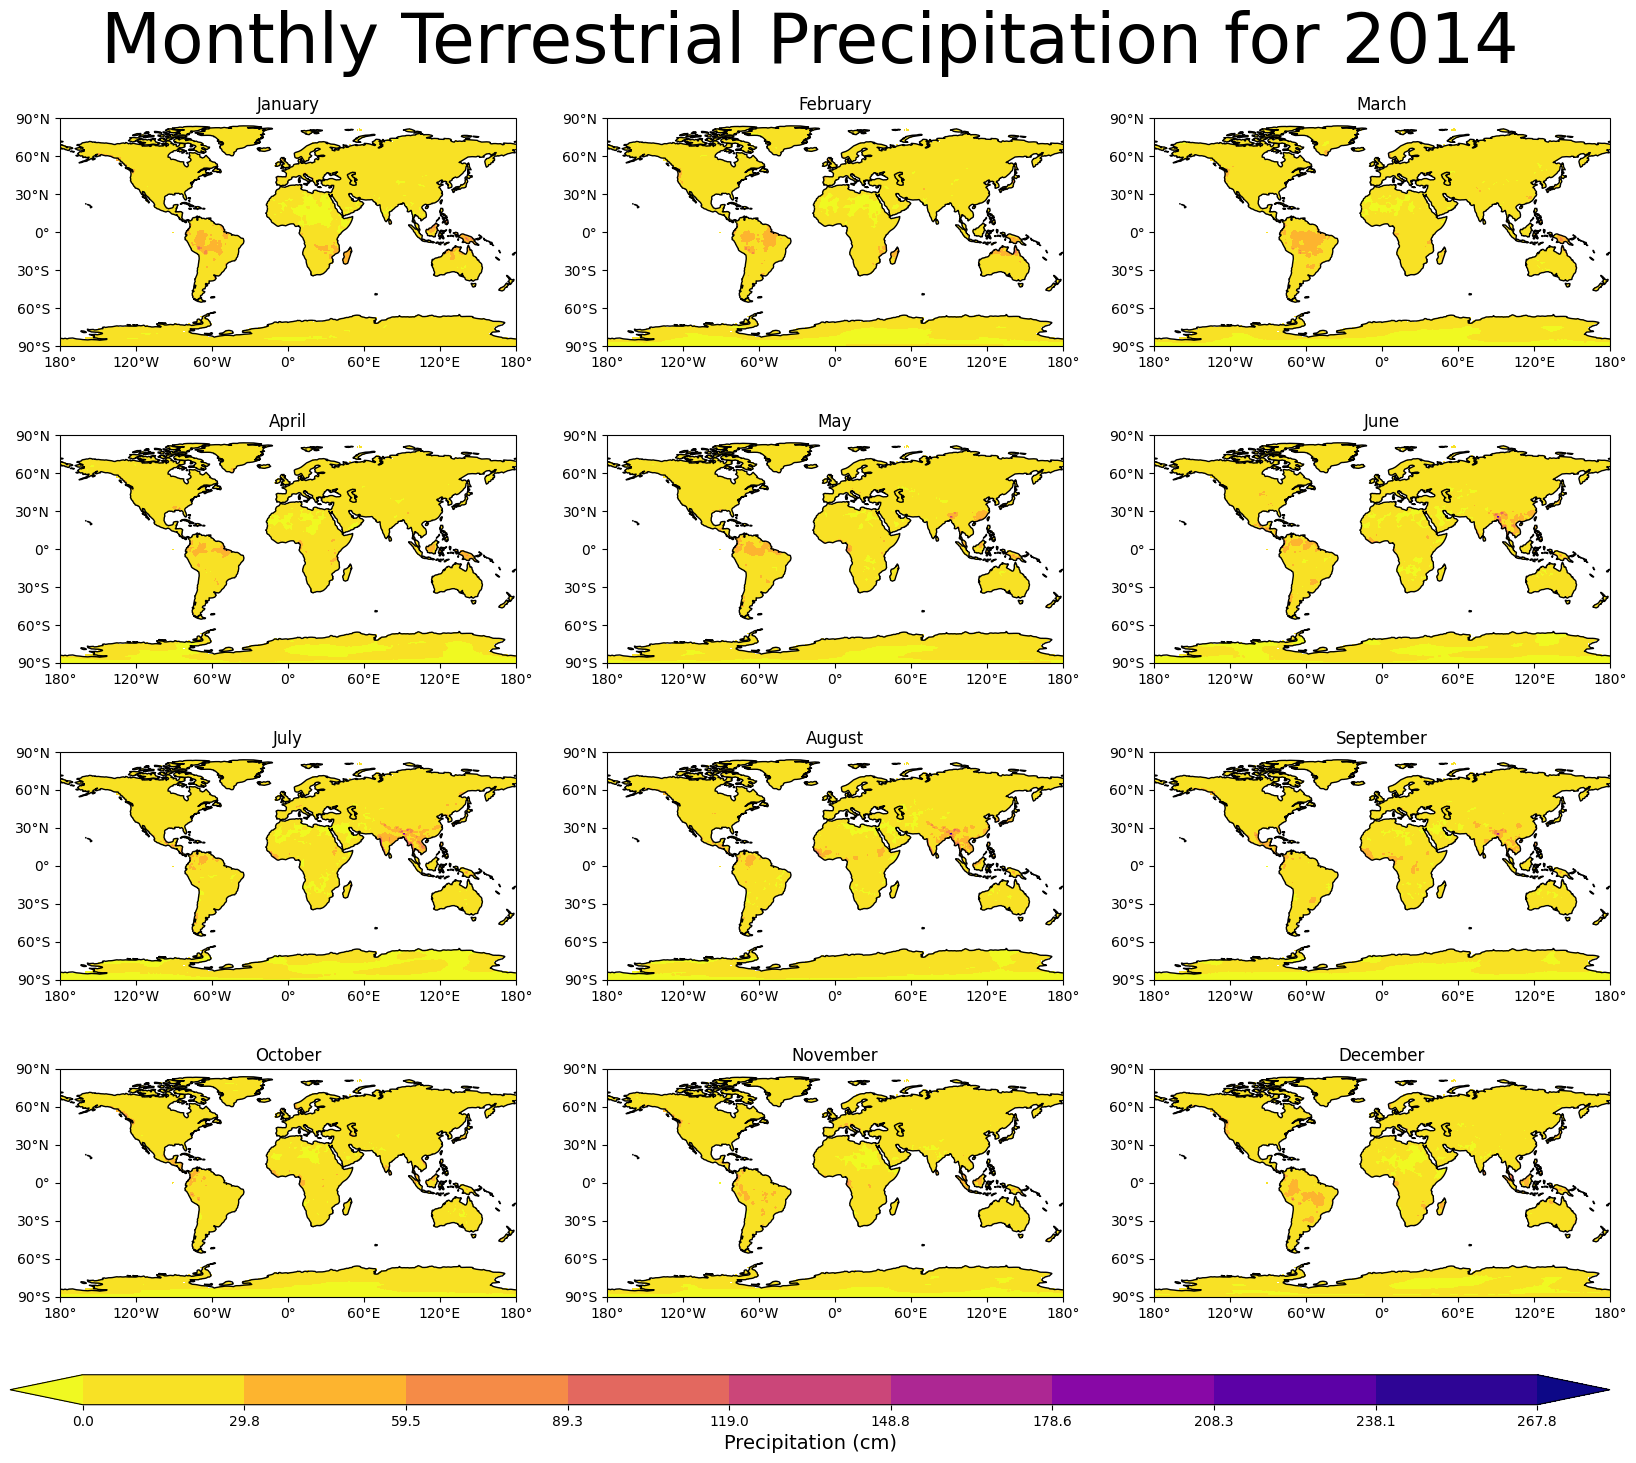

In [37]:
# Define the figure and each axis for the 4 rows and 3 columns
fig, axs = plt.subplots(4, 3, figsize=(20, 15), subplot_kw={'projection': ccrs.PlateCarree()})

# Flatten it into a 1-D array
axs = axs.flatten()

# Define contour levels
min_value = precipitation.min().values
max_value = precipitation.max().values
levels = 10
clevs = np.linspace(min_value, max_value, levels)
cmap = 'plasma_r'

# Loop over all of the months and plot
for i, month in enumerate(month_names):
    # Select the month
    month_data = precipitation.isel(time=i)
    
    # Add the cyclic point
    month_data, lons = add_cyclic_point(month_data, coord=ds['lon'])
        
    # Contour plot
    cs = axs[i].contourf(lons, ds['lat'], month_data, clevs,
                         transform=ccrs.PlateCarree(),
                         cmap=cmap, extend='both')
    
    # Longitude labels
    axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    axs[i].xaxis.set_major_formatter(lon_formatter)

    # Latitude labels
    axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    axs[i].yaxis.set_major_formatter(lat_formatter)

    # Title each subplot with the name of the month
    axs[i].set_title(month)
    
    #Draw the coastines for each subplot
    axs[i].coastlines()
    
# Draw the colorbar
cbar_ax = fig.add_axes([0.1, 0.05, 0.8, 0.02])
cbar=fig.colorbar(cs, cax=cbar_ax, orientation='horizontal', label='Precipitation (cm)')
cbar.ax.set_xlabel('Precipitation (cm)', fontsize=14, ha='center')

# Add title
plt.suptitle('Monthly Terrestrial Precipitation for 2014', fontsize=50, ha='center')

# Adjust the space between the title and the subplots
fig.subplots_adjust(top=0.92)